In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [8]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [10]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [12]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

<h1>Task 1: Distribution of Birth Rates </h1>

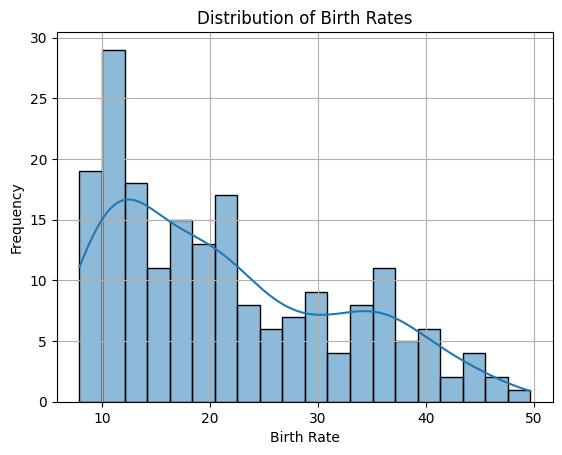

In [66]:
#histplot
sns.histplot(internet['Birth rate'], bins=20, kde=True)

plt.title("Distribution of Birth Rates")
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.grid()
plt.show()

<h3>Insight: The histogram provides a visual representation of birth rate distribution, helping identify central tendencies and potential outliers.</h3>

<h1>Task 2: Top 5 Countries with Highest Internet Usage </h1>

In [67]:
top_5_internet = internet.nlargest(5, 'Internet users')[['Country Name', 'Internet users']]
print("Top 5 Countries with Highest Internet Usage:")

print(top_5_internet)

Top 5 Countries with Highest Internet Usage:
    Country Name  Internet users
84       Iceland         96.5468
22       Bermuda         95.3000
131       Norway         95.0534
163       Sweden         94.7836
47       Denmark         94.6297


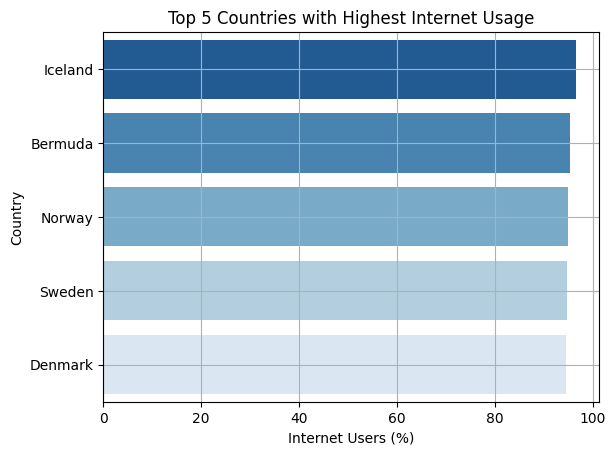

In [68]:
#barplot
sns.barplot(x='Internet users', y='Country Name', data=top_5_internet, palette="Blues_r")

plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.title("Top 5 Countries with Highest Internet Usage")
plt.grid()
plt.show()

<h3>Insight: Identifying the top internet-using countries highlights global digital trends and potential disparities in internet accessibility.</h3>

<h1>Task 3: Count of Countries by Income Group </h1>

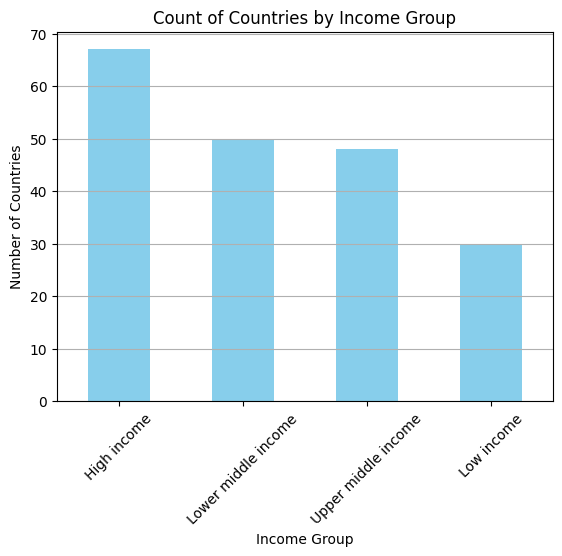

In [69]:
#barplot
income_counts = internet['Income Group'].value_counts()
income_counts.plot(kind='bar', color='skyblue')

plt.title("Count of Countries by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<h3>Insight: Categorizing countries by income levels allows for an understanding of economic diversity and its correlation with other factors.</h3>

<h1>Task 4: Box Plot of Internet Usage (Optional) </h1>

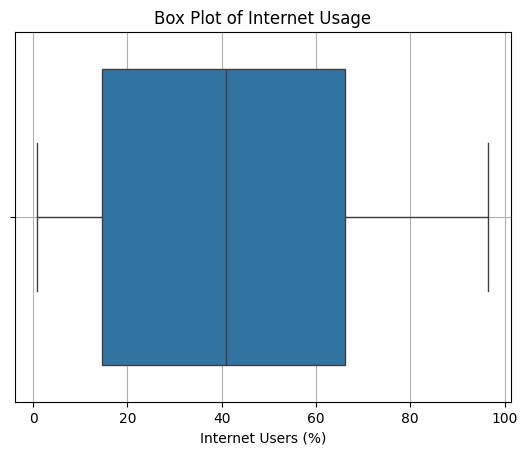

In [70]:
#boxplot
sns.boxplot(x=internet['Internet users'])

plt.title("Box Plot of Internet Usage")
plt.xlabel("Internet Users (%)")
plt.grid()
plt.show()

<h3>Insight: The box plot provides a summary of internet usage distribution, highlighting the median, quartiles, and potential outliers.</h3>

<h1>Task 5: Countries with No Internet Access </h1>

In [71]:
no_internet = internet[internet['Internet users'] == 0][['Country Name']]

if no_internet.empty:
    print("No countries found with 0% internet access.")
else:
    print("Countries with No Internet Access:")
    print(no_internet)

No countries found with 0% internet access.


<h3>Insight: Identifying countries with no internet access sheds light on global connectivity gaps and areas needing technological development.</h3>

<h1>Task 6: Average Birth Rate</h1>

Average Birth Rate: 21.47


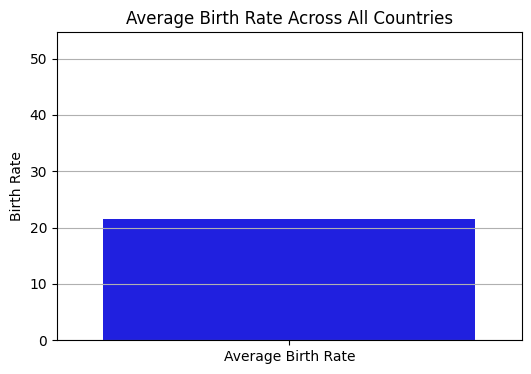

In [72]:
average_birth_rate = internet['Birth rate'].mean()
print(f"Average Birth Rate: {average_birth_rate:.2f}")

#barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=["Average Birth Rate"], y=[average_birth_rate], color="blue")

plt.ylabel("Birth Rate")
plt.title("Average Birth Rate Across All Countries")

plt.ylim(0, internet['Birth rate'].max() + 5)

plt.grid(axis='y')
plt.show()

<h3>Insight: The average birth rate helps in understanding global fertility trends and can be used for demographic planning.</h3>

<h1>Task 7: Scatter Plot - Birth Rate vs Internet Usage</h1>

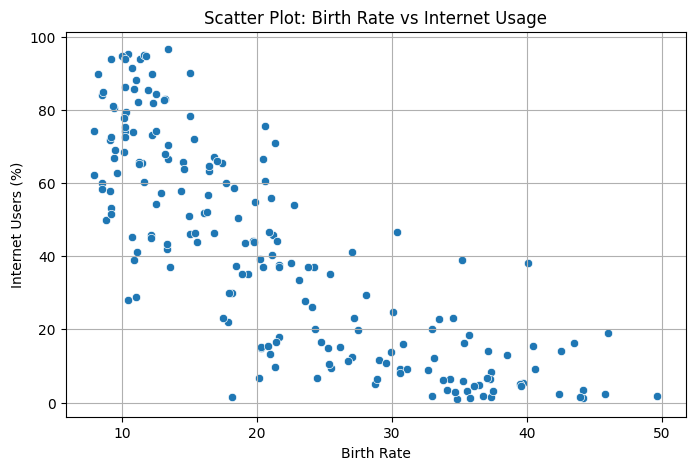

In [73]:
#scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=internet['Birth rate'], y=internet['Internet users'])

plt.title("Scatter Plot: Birth Rate vs Internet Usage")
plt.xlabel("Birth Rate")
plt.ylabel("Internet Users (%)")
plt.grid()
plt.show()

<h3>Insight: This scatter plot reveals potential correlations between internet usage and birth rates, highlighting socioeconomic patterns.</h3>

<h1>Task 8: Countries with Birth Rates Above 40</h1>

Countries with Birth Rates Above 40:
         Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


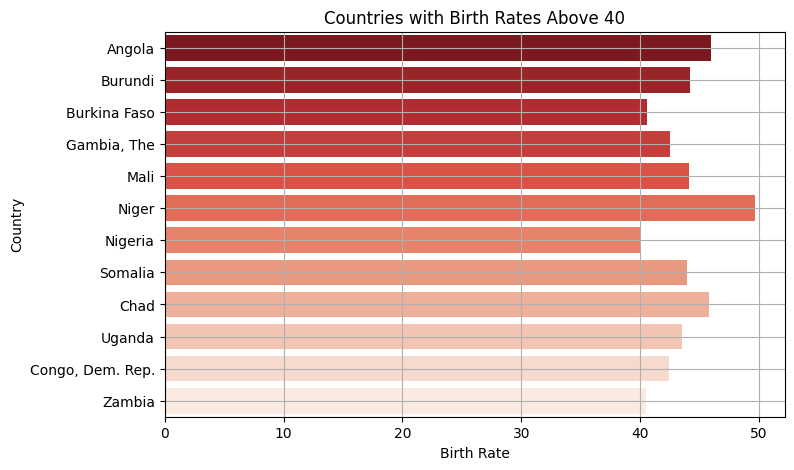

In [74]:
high_birth_rate = internet[internet['Birth rate'] > 40][['Country Name', 'Birth rate']]
print("Countries with Birth Rates Above 40:")
print(high_birth_rate)

#barplot
plt.figure(figsize=(8, 5))
sns.barplot(y=high_birth_rate['Country Name'], x=high_birth_rate['Birth rate'], palette="Reds_r")

plt.xlabel("Birth Rate")
plt.ylabel("Country")
plt.title("Countries with Birth Rates Above 40")
plt.grid()
plt.show()

<h3>Insight: Identifying countries with high birth rates helps in analyzing population growth trends and related policy implications.</h3>

<h1>Task 9: Pie Chart of Income Groups</h1>

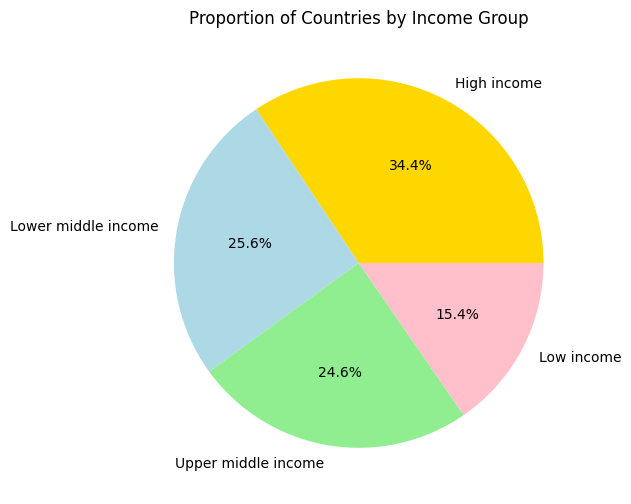

In [75]:
#piepchart

plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen', 'pink'])

plt.title("Proportion of Countries by Income Group")
plt.show()


<h3>Insight: The pie chart visually represents the proportion of countries in different income groups, offering insights into global economic distribution</h3>

<h1>Task 10: Correlation Between Birth Rate and Internet Usage</h1>

Correlation Between Birth Rate and Internet Usage: -0.82


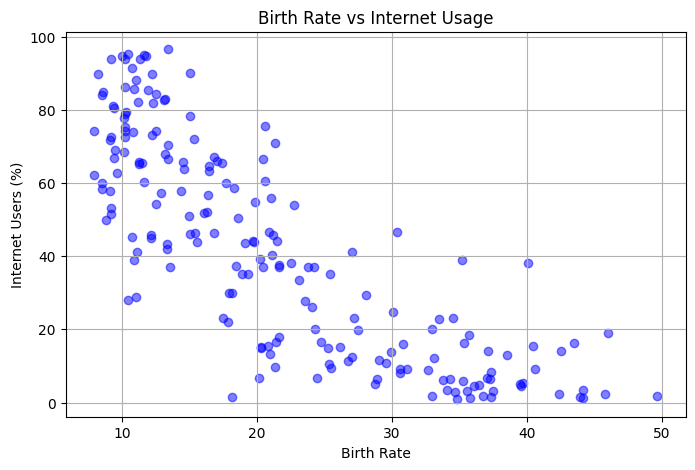

In [76]:
correlation = internet[['Birth rate', 'Internet users']].corr().iloc[0, 1]
print(f"Correlation Between Birth Rate and Internet Usage: {correlation:.2f}")

#scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(internet['Birth rate'], internet['Internet users'], alpha=0.5, color='blue')
plt.title("Birth Rate vs Internet Usage")
plt.xlabel("Birth Rate")
plt.ylabel("Internet Users (%)")
plt.grid()
plt.show()


<h3>Insight: Analyzing the correlation between birth rate and internet usage can reveal potential socioeconomic relationships.</h3>